In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
prices = yf.download('WEGE3.SA' , start='1994-12-29')

[*********************100%***********************]  1 of 1 completed


In [4]:
prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.122969,378560
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.118653,47320
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.118653,0
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.107867,250120
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.107867,135200
...,...,...,...,...,...,...
2023-06-12,37.970001,38.020000,37.610001,37.750000,37.750000,7812500
2023-06-13,37.900002,37.930000,37.230000,37.349998,37.349998,10187500
2023-06-14,37.570000,37.869999,37.410000,37.869999,37.869999,11544100


### Calculando o Retorno

Sendo $r_t$ e $P_t$ o **retorno simples** e o **preço** no tempo $t$:

$$ r_{t} \equiv \frac{P_{t}-P_{t-1}}{P_{t-1}} = \frac{P_{t}}{P_{t-1}} - 1 $$


In [5]:
# Entendendo o deslocamento com shift()
df = pd.DataFrame()
df['price'] = prices['Adj Close']
df['price_shift_1'] = prices['Adj Close'].shift(1)
df.head()

,price,price_shift_1
Date,,
2000-01-03,0.122969,NaN
2000-01-04,0.118653,0.122969
2000-01-05,0.118653,0.118653
2000-01-06,0.107867,0.118653
2000-01-07,0.107867,0.107867


In [6]:
# Calculando o retorno usando shift()
retorno_diario = (prices['Adj Close'] / prices['Adj Close'].shift(1) - 1).dropna()

In [7]:
retorno_diario

Date
2000-01-04   -0.035092
2000-01-05    0.000000
2000-01-06   -0.090910
2000-01-07    0.000000
2000-01-10    0.000000
                ...   
2023-06-12   -0.001323
2023-06-13   -0.010596
2023-06-14    0.013922
2023-06-15   -0.000792
2023-06-16    0.000264
Name: Adj Close, Length: 5891, dtype: float64

In [8]:
# Calculando o retorno usando pct_change()
retorno_diario = prices['Adj Close'].pct_change()

In [9]:
retorno_diario

Date
2000-01-03         NaN
2000-01-04   -0.035092
2000-01-05    0.000000
2000-01-06   -0.090910
2000-01-07    0.000000
                ...   
2023-06-12   -0.001323
2023-06-13   -0.010596
2023-06-14    0.013922
2023-06-15   -0.000792
2023-06-16    0.000264
Name: Adj Close, Length: 5892, dtype: float64

O **retorno logarítmico** é dado por:

$ R_t\equiv ln\bigg( \frac{P_t}{P_{t-1}}\bigg)$

In [10]:
retorno_diario_log = np.log(prices['Adj Close'] / prices['Adj Close'].shift(1)).dropna()

In [11]:
retorno_diario_log

Date
2000-01-04   -0.035723
2000-01-05    0.000000
2000-01-06   -0.095312
2000-01-07    0.000000
2000-01-10    0.000000
                ...   
2023-06-12   -0.001324
2023-06-13   -0.010653
2023-06-14    0.013826
2023-06-15   -0.000792
2023-06-16    0.000264
Name: Adj Close, Length: 5891, dtype: float64

### Retorno mensal

In [14]:
retorno_mensal = prices['Adj Close'].resample('M', kind='period').last().pct_change().dropna().to_frame()

In [15]:
retorno_mensal

,Adj Close
Date,
2000-02,-0.090910
2000-03,0.000000
2000-04,0.000000
2000-05,-0.049997
2000-06,0.000000
...,...
2023-02,0.029941
2023-03,0.036880
2023-04,0.014057


In [16]:
retorno_mensal['mês'] = retorno_mensal.index.month
retorno_mensal['ano'] = retorno_mensal.index.year

In [18]:
tab_retorno_mensal = retorno_mensal.pivot(values='Adj Close', columns='mês', index='ano' )

In [19]:
tab_retorno_mensal

mês,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
2000,NaN,-0.090910,0.000000,0.000000,-0.049997,0.000000,0.000000,0.189473,0.044251,0.000000,0.000000,0.000000
2001,0.000000,0.000000,0.186439,0.135717,-0.044026,0.000000,0.000000,0.184210,-0.055556,0.000000,0.147058,0.000000
2002,0.000000,0.000000,0.000000,0.128205,-0.045455,-0.047619,0.000000,-0.024999,0.000000,0.015386,0.191919,0.000000
2003,0.114407,0.000000,0.000000,0.026616,0.092593,0.000000,0.000000,0.000000,0.322035,0.000000,0.000000,0.282050
2004,0.042002,0.000000,-0.007679,0.000000,0.000000,0.315282,0.001470,0.000000,0.013216,0.101448,0.006579,0.000000
2005,0.000000,0.019608,0.000000,0.000000,0.000000,-0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006,0.000000,0.000000,0.086667,0.001227,-0.019608,0.000000,0.250000,-0.099000,-0.001111,0.222223,0.054546,0.120689
2007,0.384615,-0.055555,0.058823,-0.027777,0.000000,0.034286,0.142542,0.006286,0.061989,0.150227,-0.050748,0.044343
2008,-0.160714,0.081798,-0.138461,0.019898,0.065533,-0.054930,-0.097903,-0.005556,-0.205240,-0.133193,-0.065041,0.090728


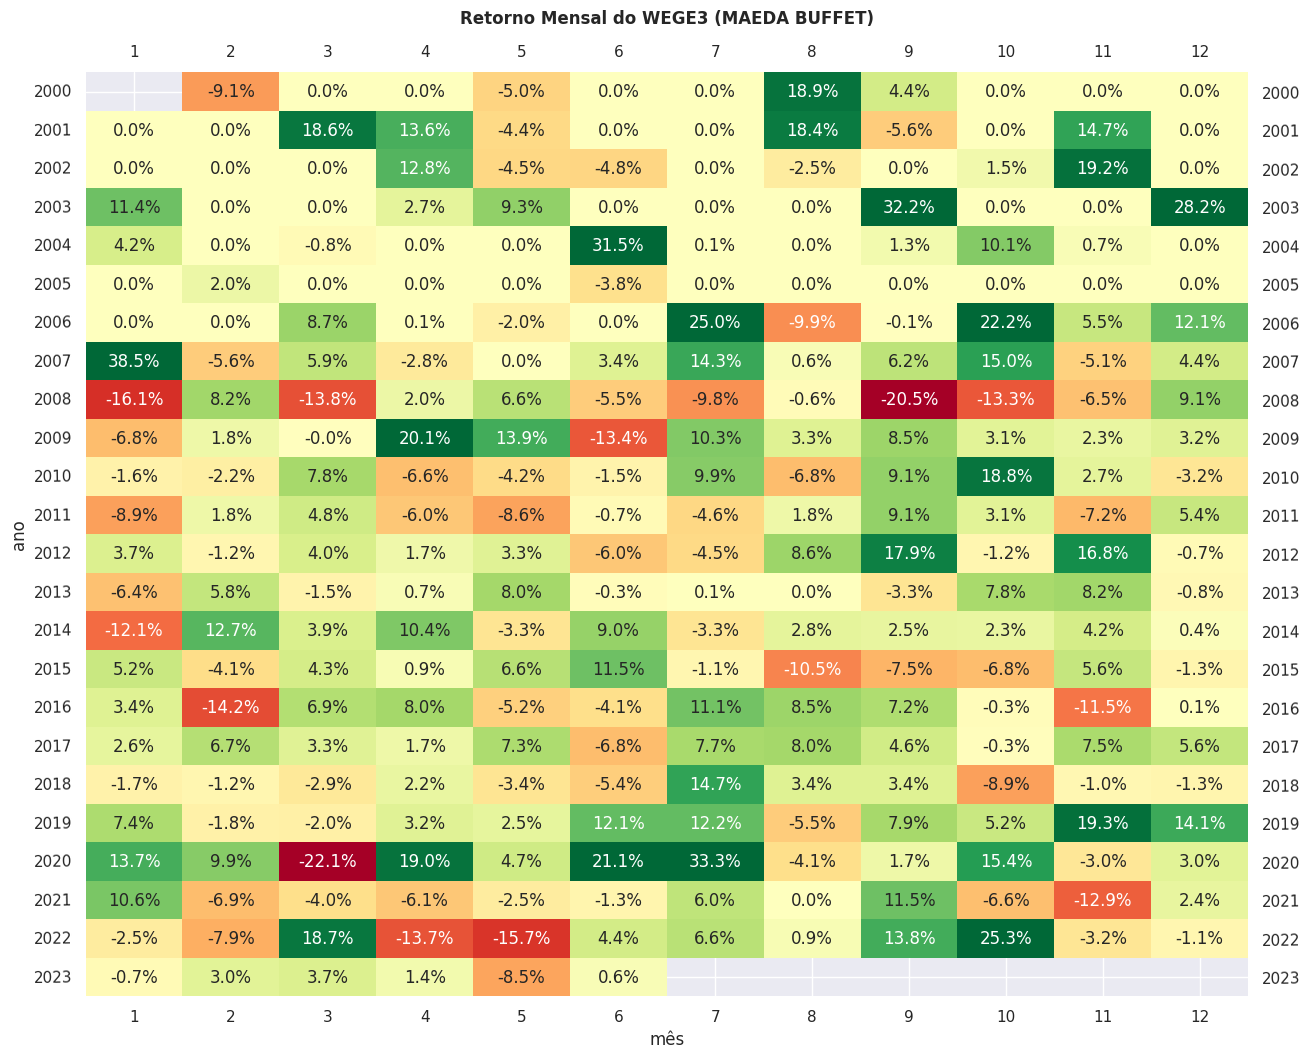

In [20]:
#@title
plt.figure(figsize=(15,12))
sns.set(font_scale=1.0)

ax = sns.heatmap(tab_retorno_mensal,
                 annot  = True,
                 fmt    = ".1%",
                 cmap   = "RdYlGn",
                 vmin   = -0.2,
                 vmax   = 0.2,
                 center = 0,
                 cbar=False)

ax.set_title('Retorno Mensal do WEGE3 (MAEDA BUFFET)', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90 )
ax.tick_params(axis = "x", labeltop=True)

### Retorno trimestral

In [21]:
### https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

retorno_trimestre = prices['Adj Close'].resample('Q', kind='period').last().pct_change().dropna().to_frame()

In [22]:
retorno_trimestre

,Adj Close
Date,
2000Q2,-0.049997
2000Q3,0.242109
2000Q4,0.000000
2001Q1,0.186439
2001Q2,0.085717
...,...
2022Q2,-0.240225
2022Q3,0.223125
2022Q4,0.199937


In [23]:
retorno_trimestre['trimestre'] = retorno_trimestre.index.quarter
retorno_trimestre['ano'] = retorno_trimestre.index.year

In [24]:
tab_retorno_trimestre = retorno_trimestre.pivot(values='Adj Close', columns='trimestre', index='ano')

In [25]:
tab_retorno_trimestre

trimestre,1,2,3,4
ano,,,,
2000,NaN,-0.049997,0.242109,0.000000
2001,0.186439,0.085717,0.118420,0.147058
2002,0.000000,0.025640,-0.024999,0.210257
2003,0.114407,0.121673,0.322035,0.282050
2004,0.034000,0.315282,0.014706,0.108695
2005,0.019608,-0.038462,0.000000,0.000000
2006,0.086667,-0.018405,0.124999,0.444446
2007,0.384615,0.005556,0.220995,0.140271
2008,-0.217777,0.027041,-0.287033,-0.116042


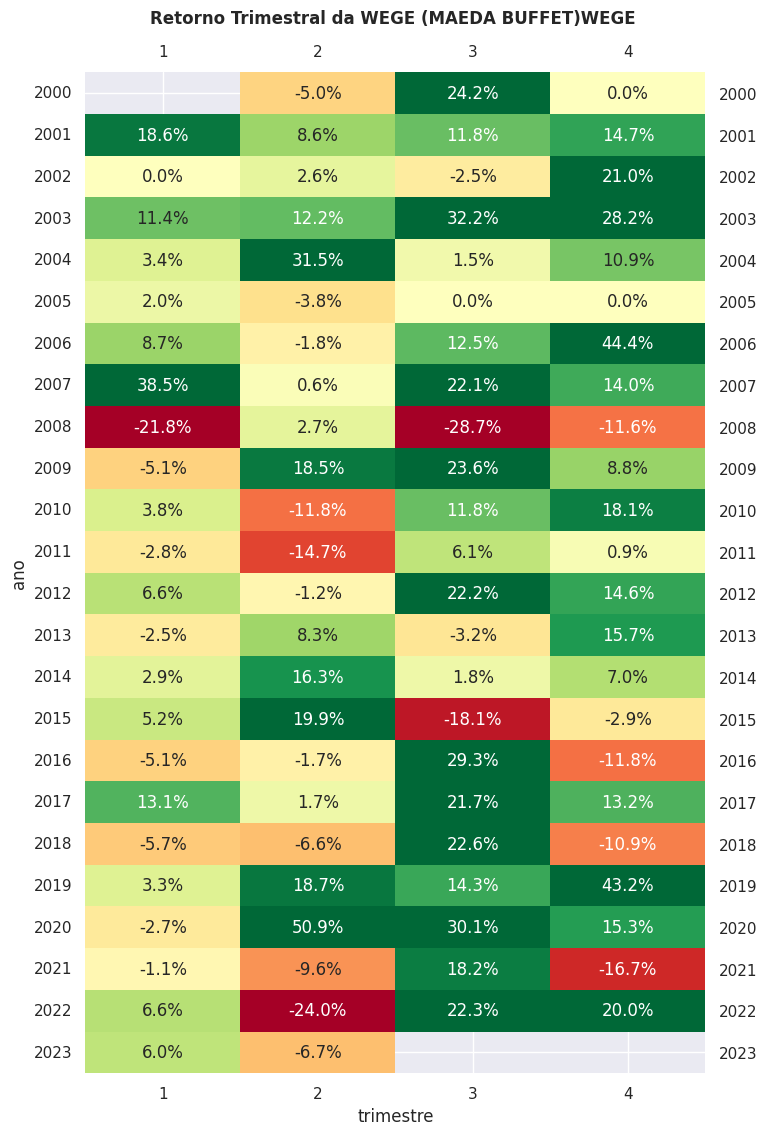

In [26]:
#@title
plt.figure(figsize=(8,13))
sns.set(font_scale=1)

ax = sns.heatmap(tab_retorno_trimestre,
                 annot  = True,
                 fmt    = ".1%",
                 cmap   = "RdYlGn",
                 vmin   = -0.2,
                 vmax   = 0.2,
                 center = 0,
                 cbar=False)

ax.set_title('Retorno Trimestral da WEGE (MAEDA BUFFET)WEGE ', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

### Retorno Anual - Janelas de Retorno

In [27]:
retorno_anual = prices['Adj Close'].resample('A', kind='period').last().to_frame()

In [28]:
retorno_anual['retorno'] = np.log(retorno_anual['Adj Close']/retorno_anual['Adj Close'].shift(1))

In [29]:
retorno_anual.dropna(inplace=True)
retorno_anual

,Adj Close,retorno
Date,,
2001,0.210341,0.502314
2002,0.254567,0.190833
2003,0.539336,0.750776
2004,0.825184,0.425268
2005,0.809004,-0.019802
2006,1.402275,0.550047
2007,2.718256,0.661895
2008,1.376290,-0.680599
2009,2.080987,0.413451


In [30]:
tab_retorno_anual = pd.DataFrame()

for ano in range(retorno_anual.index.size, 0, -1):
    tab_retorno_anual[f"{ano}A"] = retorno_anual['retorno'].rolling(ano).mean()

In [31]:
tab_retorno_anual


,23A,22A,21A,20A,19A,18A,17A,16A,15A,14A,...,10A,9A,8A,7A,6A,5A,4A,3A,2A,1A
Date,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502314
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346574,0.190833
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481308,0.470805,0.750776
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.467298,0.455626,0.588022,0.425268
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.369878,0.336769,0.385414,0.202733,-0.019802
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.399906,0.379424,0.426572,0.318504,0.265122,0.550047
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.437333,0.426503,0.473637,0.404352,0.397380,0.605971,0.661895
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.297591,0.268345,0.281264,0.187362,0.127885,0.177114,-0.009352,-0.680599
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.310465,0.286484,0.300148,0.225043,0.184998,0.236198,0.131582,-0.133574,0.413451


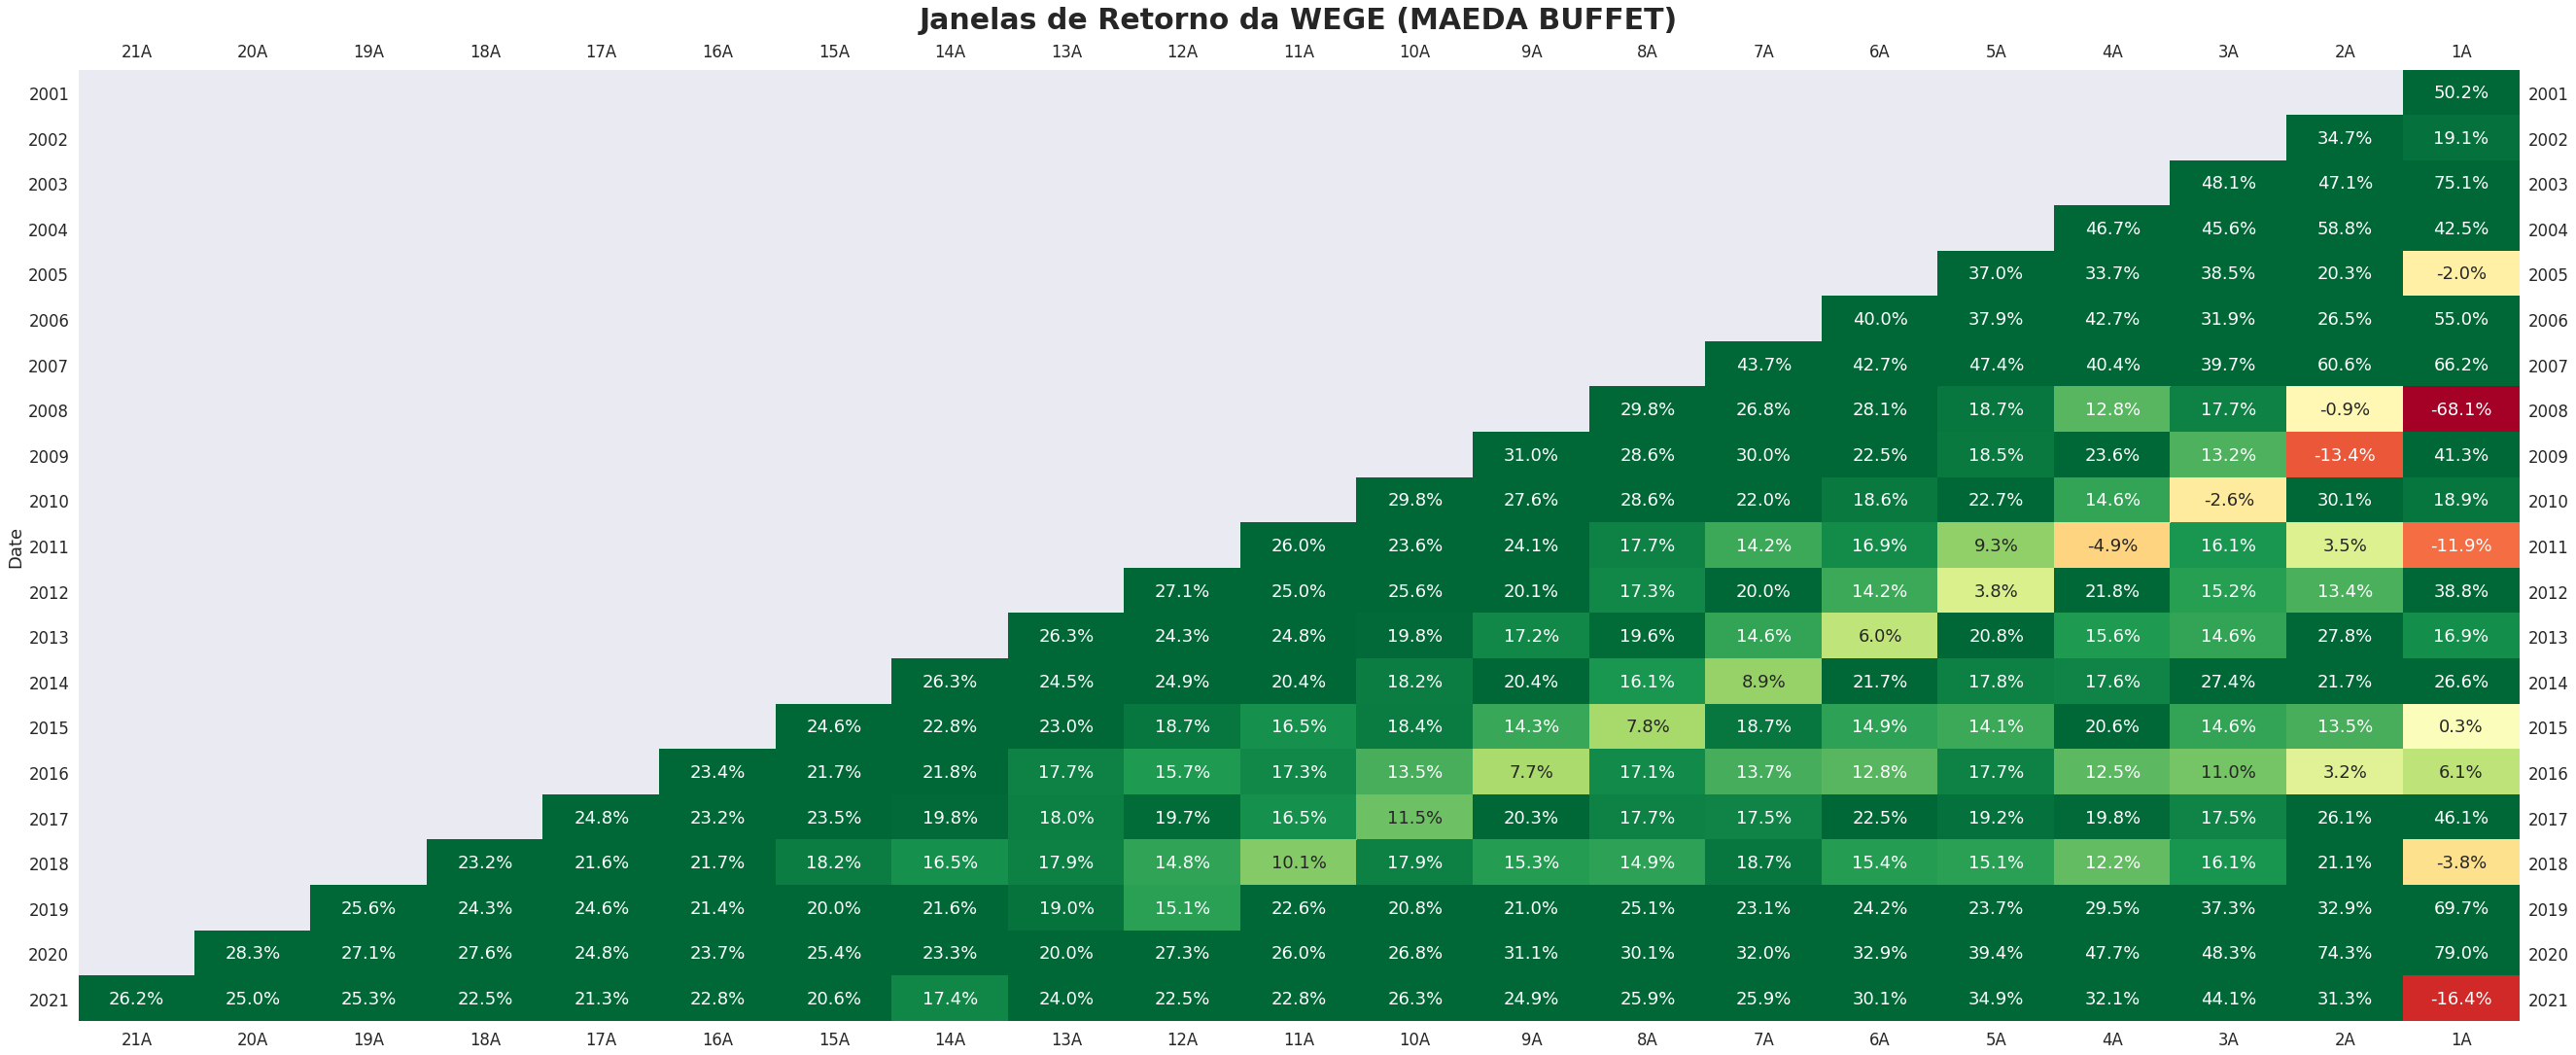

In [ ]:
#@title
plt.figure(figsize=(45,18))
sns.set(font_scale=1.5)

ax = sns.heatmap(tab_retorno_anual,
                 annot  = True,
                 fmt    = ".1%",
                 cmap   = "RdYlGn",
                 vmin   = -0.2,
                 vmax   = 0.2,
                 center = 0,
                 cbar=False)

ax.set_title('Janelas de Retorno da WEGE (MAEDA BUFFET)', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0 )
ax.tick_params(axis = "x", labeltop=True)

### **Como calcular o retorno acumulado**

1a) Qual o retorno em 2021 de quem investiu no primeiro dia de 2008?

In [ ]:
print(f'retorno acumulado: {np.exp(14*0.174) - 1:.1%}')

retorno acumulado: 1042.7%


1b) Quanto teria hoje se tivesse investido R$10 mil?

In [ ]:
result2008 = (f'saldo final: R$ {10000 * np.exp(14*0.174):_.2f}')
result2008 = result2008.replace('.',',').replace('_','.')
result2008


'saldo final: R$ 114.272,40'

2a) Qual o retorno em 2021 de quem investiu na primeiro dia de 2009?

In [ ]:
print(f'{np.exp(13*0.24) - 1:.1%}')

2164.6%


2b) Quanto teria hoje se tivesse investido R$10 mil?

In [ ]:
result2009 = (f'saldo final: R$ {10000 * np.exp(13*0.24):_.2f}')
result2009 = result2009.replace('.',',').replace('_','.')
result2009

'saldo final: R$ 226.463,80'

In [ ]:
#@title
tab_retorno_reais = pd.DataFrame()

for ano in range(retorno_anual.index.size, 0, -1):
    tab_retorno_reais[f"{ano}A"] = 100 * np.exp(ano * retorno_anual['retorno'].rolling(ano).mean())
tab_retorno_reais

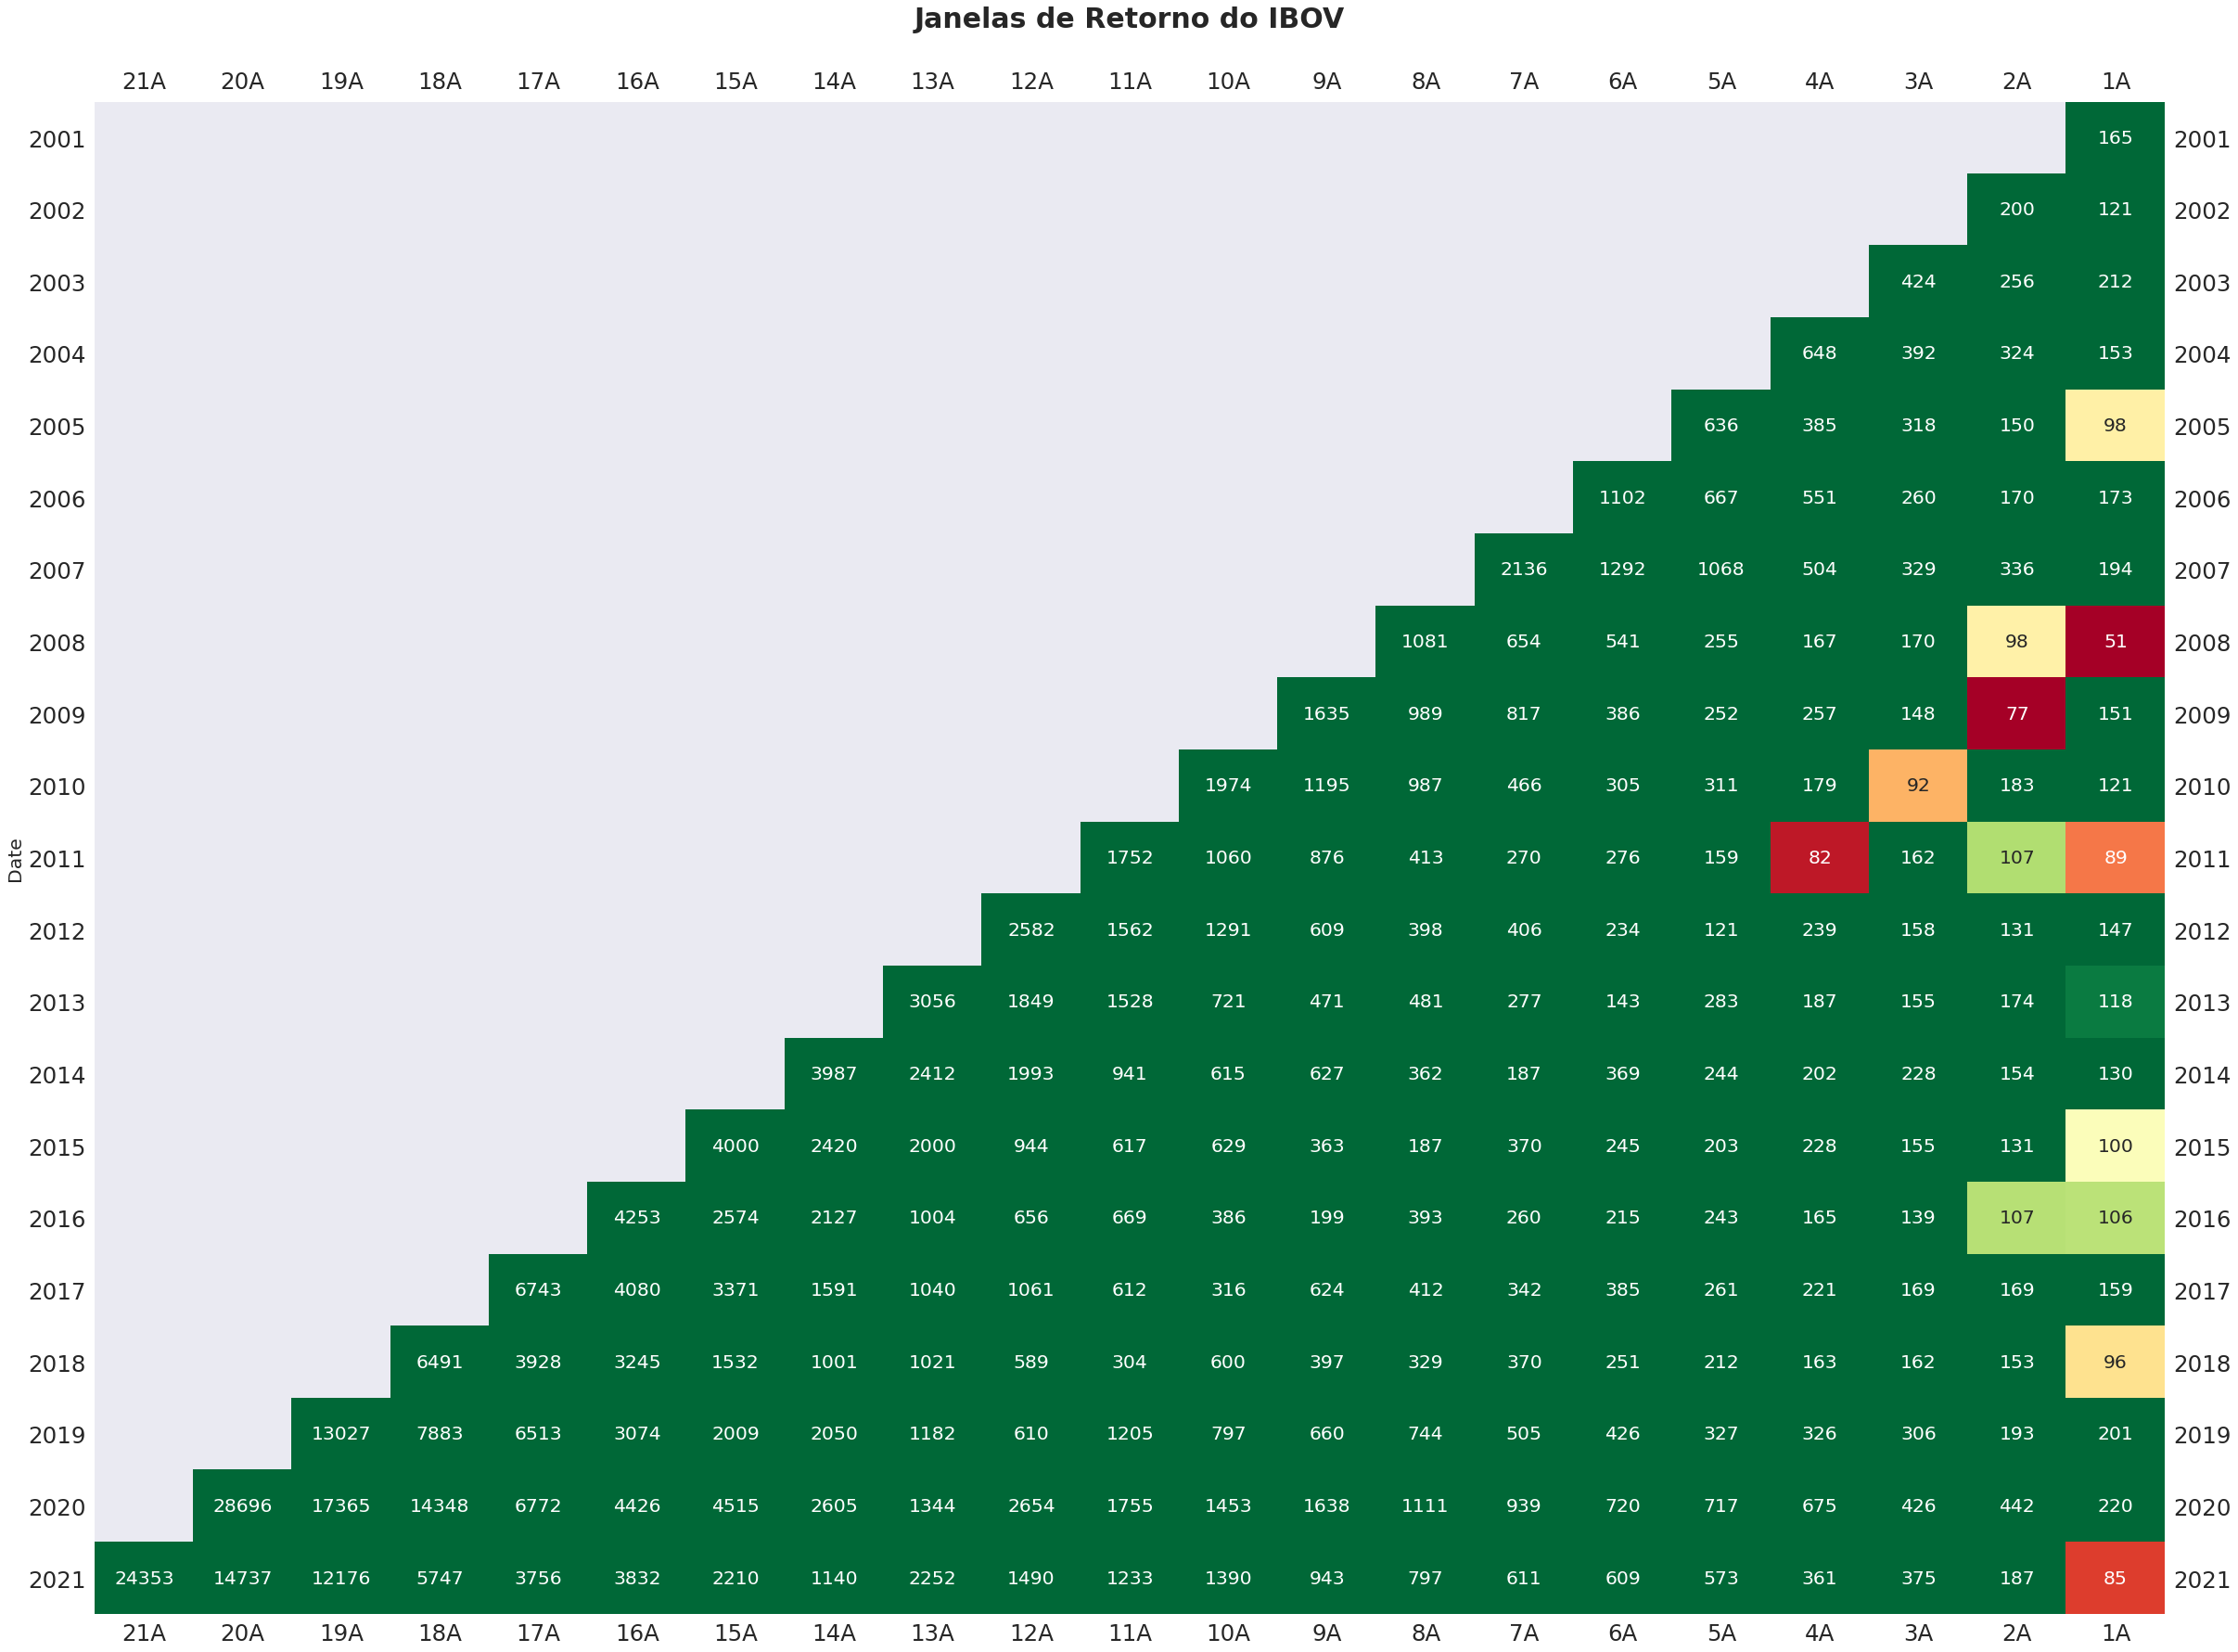

In [ ]:
#@title Gráfico
plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

ax = sns.heatmap(tab_retorno_reais,
                 annot  = True,
                 fmt    = ".0f",
                 cmap   = "RdYlGn",
                 vmin   = 80,
                 vmax   = 120,
                 center = 100,
                 cbar=False)

ax.set_title('Janelas de Retorno do IBOV', pad=80, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large' )
ax.tick_params(axis = "x", labeltop=True,  labelsize='large' )

In [ ]:
#@title Retornos
retorno_neg = tab_retorno_reais[tab_retorno_reais < 100].count()
retorno_pos = tab_retorno_reais[tab_retorno_reais >= 100].count()

total_de_janelas = tab_retorno_reais.count()
pd.concat([-retorno_neg, retorno_pos],
          axis=1,
          keys=['Retorno Negativo','Retorno Positivo'])\
          .style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,Retorno Negativo,Retorno Positivo
21A,0,1
20A,0,2
19A,0,3
18A,0,4
17A,0,5
16A,0,6
15A,0,7
14A,0,8
13A,0,9
12A,0,10
